$$
\begin{align*}
1 + x_1 + 2  x_2 + 3 x_3 =& 0,\\
x_1 - x_3 =& 0.
\end{align*}
$$

Examining Node x1
Node x1 as a function of other nodes
x1 + (-0.9999999999999991 x3) = 0

Examining Node x2
Node x2 as a function of other nodes
x2 + (2.0000004172325134 x3) + (0.3675723802741412 x3x3) = 0

Examining Node x3
Node x3 as a function of other nodes
x3 + (-0.9999999999999991 x1) = 0



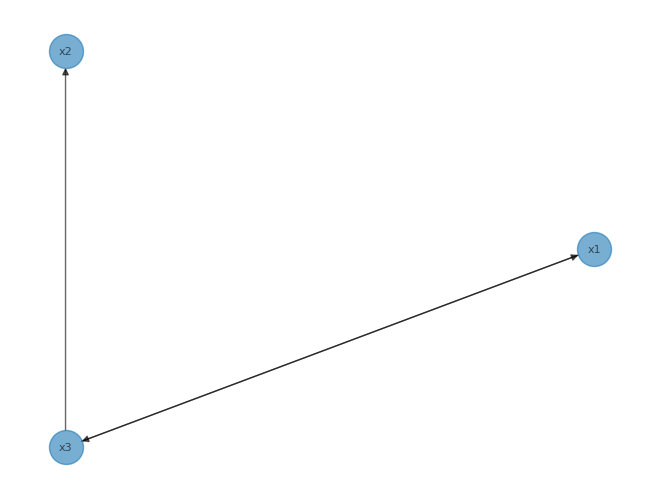

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from GraphDiscovery import *

from jax.config import config
config.update("jax_enable_x64", True)

def matern_five_halfs(v1, v2, a=1, sigma=1):
    d = np.sqrt(np.sum((v1 - v2) ** 2))
    return a*(1+np.sqrt(5)*d/sigma +5*d**2/(3*sigma**2))*np.exp(-np.sqrt(5)*d/sigma)

ks = [matern_five_halfs]*3
kpca = GraphDiscovery()

d = 3
preG = nx.complete_graph(d).to_directed()
G = nx.create_empty_copy(preG)
names = onp.array(['x1', 'x2', 'x3'])
G = nx.relabel_nodes(G, dict(zip(range(d), names)))

examing_nodes = np.array([0, 1, 2])

x1s = np.linspace(-2, 2,100)
x3s = x1s #+ onp.random.normal(size = 100)*1e-1
x2s = (-1 - x1s - 3 * x3s)/2 #+ onp.random.normal(size = 100)*1e-1

# x1s = np.linspace(-2, 2,100)
# x3s = 0.5 * x1s ** 2 #+ onp.random.normal(size = 100)*1e-1
# x2s = (-1 - x1s - 3 * x3s)/2 #+ onp.random.normal(size = 100)*1e-1

fig = plt.figure
X = np.array([x1s, x2s, x3s])
gamma = 1e-13
G = kpca.discovery_in_graph(X, ks, gamma, G, names, examing_nodes, beta1=1, beta2=1e-10, beta3=0, epsilon=1e-3, verbose=True)
kpca.plot_graph(G)
plt.show()

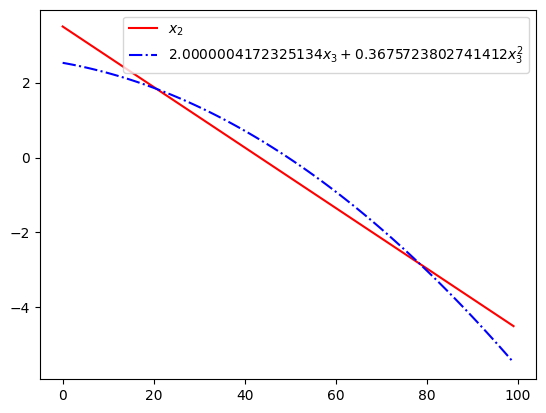

In [5]:
plt.plot(x2s, 'r-', label=r'$x_2$')
plt.plot(-(2.0000004172325134 * x3s) - (0.3675723802741412 * x3s * x3s), 'b-.', label=r'$2.0000004172325134 x_3 + 0.3675723802741412 x_3^2$')
plt.legend(loc='upper right')

$$
\begin{align*}
1 + x_1 + 2  x_2 + 3 x_3 =& 0,\\
x_1^2 - x_3 =& 0.
\end{align*}
$$

Examining Node x1
Node x1 as a function of other nodes
x1 + (0.6157461203572899 x2x2) + (2.9155815483340994 x3x2) + (3.096816660584193 x3x3) = 0

Examining Node x2
Node x2 as a function of other nodes
x2 + (0.5 ) + (0.49999999999999845 x1) + (1.4999999999999976 x3) = 0

Examining Node x3
Node x3 as a function of other nodes
x3 + (-0.9999969971456015 x1x1) = 0



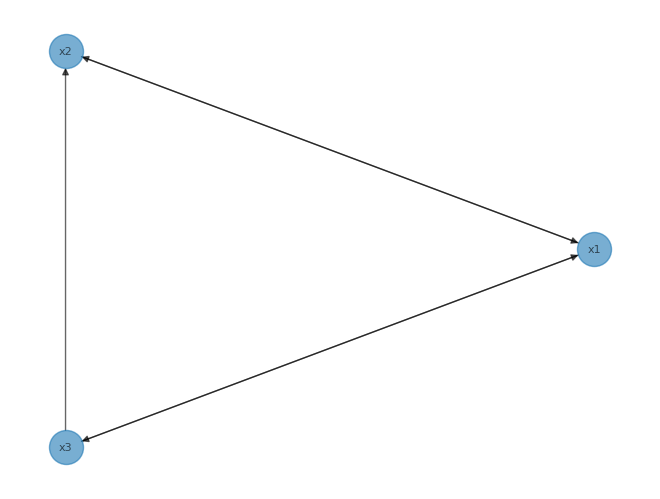

In [14]:
import matplotlib.pyplot as plt
import numpy as np

from GraphDiscovery import *

from jax.config import config
config.update("jax_enable_x64", True)

def matern_five_halfs(v1, v2, a=1, sigma=1):
    d = np.sqrt(np.sum((v1 - v2) ** 2))
    return a*(1+np.sqrt(5)*d/sigma +5*d**2/(3*sigma**2))*np.exp(-np.sqrt(5)*d/sigma)

ks = [matern_five_halfs]*3
kpca = GraphDiscovery()

d = 3
preG = nx.complete_graph(d).to_directed()
G = nx.create_empty_copy(preG)
names = onp.array(['x1', 'x2', 'x3'])
G = nx.relabel_nodes(G, dict(zip(range(d), names)))

examing_nodes = np.array([0, 1, 2])

x1s = np.linspace(-2, 2,100)
x3s = x1s ** 2 #+ onp.random.normal(size = 100)*1e-1
x2s = (-1 - x1s - 3 * x3s)/2 #+ onp.random.normal(size = 100)*1e-1

# x1s = np.linspace(-2, 2,100)
# x3s = 0.5 * x1s ** 2 #+ onp.random.normal(size = 100)*1e-1
# x2s = (-1 - x1s - 3 * x3s)/2 #+ onp.random.normal(size = 100)*1e-1

fig = plt.figure
X = np.array([x1s, x2s, x3s])
gamma = 1e-13
G = kpca.discovery_in_graph(X, ks, gamma, G, names, examing_nodes, beta1=1, beta2=1e-10, beta3=0, epsilon=1e-3, verbose=True)
kpca.plot_graph(G)
plt.show()

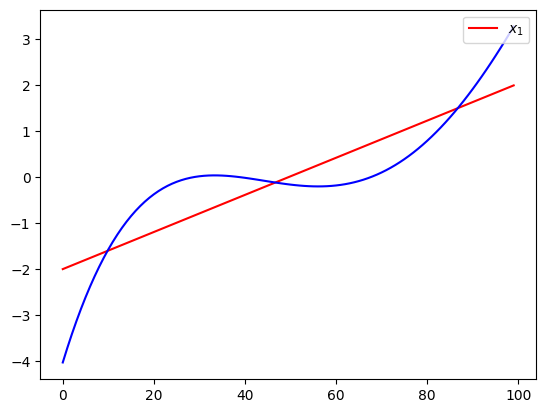

In [15]:
plt.plot(x1s, 'r-', label=r'$x_1$')
plt.plot(-(0.6157461203572899 * x2s * x2s) - (2.9155815483340994 * x3s * x2s) - (3.096816660584193 * x3s * x3s), 'b-')
plt.legend(loc='upper right')
